In [1]:
import numpy as np ,cv2
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image

In [2]:
# 1. 데이터셋 생성
mnist = tf.keras.datasets.mnist #mnist 데이터 읽어오기 
(x_train,y_train),(x_test,y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
# mnist 이미지는 픽셀값이 0과 1 사이로 정규화 되어있다.
#사진을 읽어오면 컬러기준으로 최대 (255,255,255) 형태로 가져오는데 여기에 255를 나누어 mnist
#데이터 처럼 0,1의 값을 가지게 만들어 정규화 시킨다 

print(x_train.shape, y_train.shape) #train : 6000장이 28*28크기로 다운로드 된다 
print(x_test.shape, y_test.shape) # test :  10000장이 28*28크기로 다운로드 된다


(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [3]:
# 2. 모델 구성하기

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax)
])


In [4]:
# 3. 모델 학습과정 설정하기 

#옵티마이저와 손실함수를 설정 정확도 매트릭스가 나오도록 컴파일
model.compile(optimizer ='adam',
              loss ='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train,y_train, epochs=5) #위의 레이어를 가진 모델로 5번 학습시킨다
score = model.evaluate(x_test,y_test)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3641 - accuracy: 0.8917
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1068 - accuracy: 0.9677
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0675 - accuracy: 0.9789
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0516 - accuracy: 0.9830
Epoch 5/5
313/313 [==============================] - 0s 553us/step - loss: 0.0741 - accuracy: 0.9772


In [5]:
# 4. 모델 학습시키기
model.fit(x_train,y_train, epochs=10) #training epoch 10 55,000 * 10개의 데이터를 학습
# 5. 모델 평가
score = model.evaluate(x_test,y_test)

Epoch 1/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0363 - accuracy: 0.9878
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0318 - accuracy: 0.9892
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0273 - accuracy: 0.9907
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0241 - accuracy: 0.9919
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0232 - accuracy: 0.9921
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0219 - accuracy: 0.9928
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0178 - accuracy: 0.9941
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0178 - accuracy: 0.9939
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0182 - accuracy: 0.9937
Epoch 10/10
313/313 [==============================] - 0s 549us/step - loss: 0.077

(28, 28)

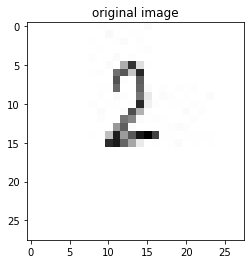

In [6]:
src = cv2.imread("./OutputImage/my_save_0.jpg",cv2.IMREAD_GRAYSCALE)
plt.title('original image')
plt.imshow(src,cmap = 'gray')
src.shape

(28, 28)

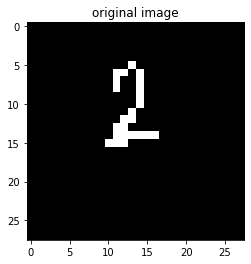

In [7]:
count = 0 
src = cv2.imread("./OutputImage/my_save_0.jpg",cv2.IMREAD_GRAYSCALE)

ret , binary = cv2.threshold(src,190,255,cv2.THRESH_BINARY_INV)
myNum = np.asarray(cv2.resize(binary, dsize=(28, 28), interpolation=cv2.INTER_AREA))/255

plt.title('original image')
plt.imshow(myNum,cmap = 'gray')
count +=1
myNum.shape#input 시 들어온 사진 크기 

In [8]:
test_num = myNum.flatten() / 255.0
test_num = test_num.reshape((-1,28,28,1))

In [9]:
print('The answer is ', model.predict_classes(test_num))

The answer is  [5]


/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(28, 28)

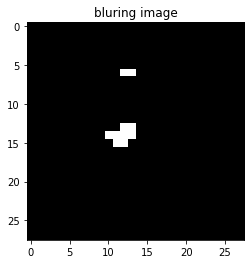

In [10]:
count = 0 
src = cv2.imread("./OutputImage/bluring_0.jpg",cv2.IMREAD_GRAYSCALE)

ret , binary = cv2.threshold(src,190,255,cv2.THRESH_BINARY_INV)
myNum = np.asarray(cv2.resize(binary, dsize=(28, 28), interpolation=cv2.INTER_AREA))/255
plt.title("bluring image")
plt.imshow(myNum,cmap='gray')
count +=1
myNum.shape


In [11]:
#gray2 = cv2.resize(255-gray2,(28,28))
test_num = myNum.flatten() / 255.0
test_num = test_num.reshape((-1,28,28,1))

In [12]:
print('The answer is ', model.predict_classes(test_num))

The answer is  [5]


(28, 28)

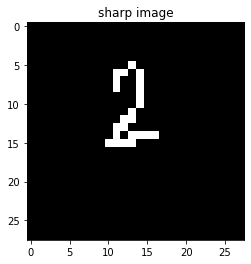

In [13]:
count = 0 
src = cv2.imread("./OutputImage/sharp_0.jpg",cv2.IMREAD_GRAYSCALE)

ret , binary = cv2.threshold(src,190,255,cv2.THRESH_BINARY_INV)
myNum = np.asarray(cv2.resize(binary, dsize=(28, 28), interpolation=cv2.INTER_AREA))/255

plt.title("sharp image")
plt.imshow(myNum,cmap='gray')
count +=1
myNum.shape


In [14]:
#gray3 = cv2.resize(255-gray3,(28,28))
test_num = myNum.flatten() / 255.0
test_num = test_num.reshape((-1,28,28,1))

In [15]:
print('The answer is ', model.predict_classes(test_num))

The answer is  [5]


(28, 28)

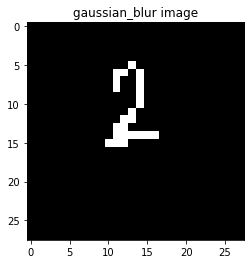

In [16]:

src = cv2.imread("./OutputImage/gaussian_blur_0.jpg",cv2.IMREAD_GRAYSCALE)

ret , binary = cv2.threshold(src,190,255,cv2.THRESH_BINARY_INV)
myNum = np.asarray(cv2.resize(binary, dsize=(28, 28), interpolation=cv2.INTER_AREA))/255

plt.title("gaussian_blur image")
plt.imshow(myNum,cmap='gray')

myNum.shape


In [17]:
#gray2 = cv2.resize(255-gray2,(28,28))
test_num = myNum.flatten() / 255.0
test_num = test_num.reshape((-1,28,28,1))

In [18]:
print('The answer is ', model.predict_classes(test_num))

The answer is  [5]


(28, 28)

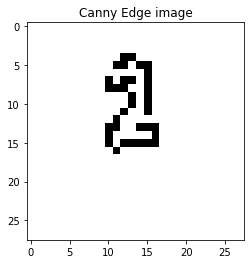

In [19]:

src = cv2.imread("./OutputImage/canny_0.jpg",cv2.IMREAD_GRAYSCALE)

ret , binary = cv2.threshold(src,190,255,cv2.THRESH_BINARY_INV)
myNum = np.asarray(cv2.resize(binary, dsize=(28, 28), interpolation=cv2.INTER_AREA))/255

plt.imshow(myNum,cmap='gray')
plt.title("Canny Edge image")
myNum.shape


In [20]:
#gray2 = cv2.resize(255-gray2,(28,28))
test_num = myNum.flatten() / 255.0
test_num = test_num.reshape((-1,28,28,1))

In [21]:
print('The answer is ', model.predict_classes(test_num))

The answer is  [5]
